In [41]:
from scipy.ndimage.filters import gaussian_filter
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import pyxdf
import commons as cm

recording_location = r"C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\pupil_labs\002"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)


002/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    eye1.intrinsics
    eye1.mp4
    eye1_lookup.npy
    eye1_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    square_marker_cache
    surface_definitions_v01
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            annotations.csv
            blink_detection_report.csv
            blinks.csv
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
  

C:\Users\Bolo\AppData\Local\Temp\ipykernel_20576\2334470469.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [42]:
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'surfaces','gaze_positions_on_surface_Surface_1.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
annotations_csv = os.path.join(recording_location, 'exports', '000', 'annotations.csv')
annotations_pd = pd.read_csv(annotations_csv)



In [43]:
image_location="../../../../data/pupil_emotibit/ES0001_S002_PC_EM/images_order"
print_file_structure(image_location)


images_order/
    Asset0001_24.tif
    Asset0002_37.tif
    Asset0003_43.tif
    Asset0004_15.tif
    Asset0005_01.tif
    Asset0006_20.tif
    Asset0007_19.tif
    Asset0008_35.tif
    Asset0009_16.tif
    Asset0010_49.tif
    Asset0011_12.tif
    Asset0012_25.tif
    Asset0014_48.tif
    Asset0015_46.tif
    Asset0016_18.tif
    Asset0017_34.tif
    Asset0018_28.tif
    Asset0020_45.tif
    Asset0021_08.tif
    Asset0022_17.tif
    Asset0024_40.tif
    Asset0026_38.tif
    Asset0027_39.tif
    Asset0028_33.tif
    Asset0029_44.tif
    Asset0030_04.tif
    Asset0031_22.tif
    Asset0032_03.tif
    Asset0033_05.tif
    Asset0034_32.tif
    Asset0035_13.tif
    Asset0036_26.tif
    Asset0037_36.tif
    Asset0039_09.tif
    Asset0040_47.tif
    Asset0041_06.tif
    Asset0042_07.tif
    Asset0043_27.tif
    Asset0044_02.tif
    Asset0045_31.tif
    Asset0046_11.tif
    Asset0047_29.tif
    Asset0048_23.tif
    Asset0049_41.tif
    Asset0050_14.tif
    Surprise01_42.tif
    Surprise02_21.t

In [44]:
images=[]
with open(image_location+'/assets.txt','r') as f:
    for image in f:
        images.append(image.replace('\n',''))
    f.close()

In [45]:
image_order=os.listdir(image_location)
image_order.remove('assets.txt')
image_order.sort(key=lambda x: int(x[x.index('_')+1:x.index('.tif')]))
image_order[0]

'Asset0005_01.tif'

In [46]:
def do_heatmap(image,gaze_on_surf_x,gaze_on_surf_y):
    grid = image.shape[0:2] # height, width of the loaded image
    heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

    # flip the fixation points
    # from the original coordinate system,
    # where the origin is at botton left,
    # to the image coordinate system,
    # where the origin is at top left
    gaze_on_surf_y = 1 - gaze_on_surf_y

    # make the histogram
    hist, x_edges, y_edges = np.histogram2d(
        gaze_on_surf_y,
        gaze_on_surf_x,
        range=[[0, 1.0], [0, 1.0]],
        bins=grid
    )


    # gaussian blur kernel as a function of grid/surface size
    filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
    filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
    heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

    # display the histogram and reference image
    print("Cover image with heatmap overlay")
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.axis('off');


lets filter properly by asset

In [47]:

conf_thr=0.95
gaze_on_surf=gaze_pd_frame[(gaze_pd_frame.on_surf==True)&(gaze_pd_frame.confidence >conf_thr)]

In [8]:
np.where(index_stim==True)

NameError: name 'index_stim' is not defined

In [9]:
annotations_pd.index[index_stim]+1
annotations_pd.iloc[annotations_pd.index[index_stim]+1]

NameError: name 'index_stim' is not defined

In [10]:
index_stim=annotations_pd['label']==images[41]
index_final=annotations_pd.index[index_stim]+1

value=annotations_pd[index_stim]['timestamp'].values[0]
value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
 
gaze_on_surf=gaze_on_surf[
    (gaze_on_surf['gaze_timestamp']>=value)&
    (gaze_on_surf['gaze_timestamp']<value_final)

]






In [48]:
def extract_annotations_timestamps(annotation,annotation_col,dataframe):
    """Function to extract timesatmps from annotations table of pupil core
       It basically serches for the annotation field in a datraframe and returns
       the rows of the annotation and of the next event

    Args:
        annotation (_str_): string of the annotation of interest
        annotation_col(_str_): column name of the annotation

    """
    index_stim=dataframe[annotation_col]==annotation
    index_final=dataframe.index[index_stim]+1

    start_row=dataframe[index_stim]
    end_row=dataframe.iloc[index_final]

    return start_row, end_row

In [49]:
initial_anotation,end_anotation=cm.extract_annotations_timestamps(images[41],'label',annotations_pd)

In [13]:
initial_anotation['timestamp'].values[0]

15469.020865400002

In [47]:
(ini['timestamp'].values)

array([15469.0208654])

Cover image with heatmap overlay


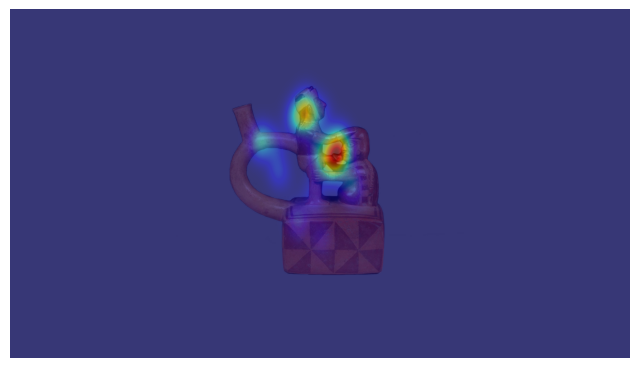

In [14]:
%matplotlib inline
image=plt.imread(image_location+'/'+image_order[41])
do_heatmap(image,gaze_on_surf['x_norm'],gaze_on_surf['y_norm'])

In [ ]:
print(images[1],image_order[1]) 


In [52]:
end_anotation['timestamp'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
image_order[41]

In [ ]:
index_stim=annotations_pd['label']==images[41]
index_final=annotations_pd.index[index_stim]+1
index_final


In [23]:
    gaze_on_surf_im=gaze_on_surf[
        (gaze_on_surf['gaze_timestamp']>=initial_anotation['timestamp'].values[0])&
        (gaze_on_surf['gaze_timestamp']<end_anotation['timestamp'].values[0])
    ]

In [32]:
any(gaze_on_surf['gaze_timestamp']<end_anotation['timestamp'].values[0])


False

In [55]:
def filter_rows_by_temporal_values(dataframe,time_column,ini_value,end_value):
    """Common funtion to return a segment of a dataframe filtered by the timestamps
      greater than or equal to a column value and less than another timestamp values.

    Args:
        dataframe (_pandas dataframe_): dataframe of interest 
        time_column (_type_): column to use for filtering
        ini_value (_type_): initial temporal value
        end_value (_type_): final temporal value
    """
        
    segmented_df=dataframe[
        (dataframe[time_column]>=ini_value)&
        (dataframe[time_column]< end_value)
    ]
    return segmented_df

In [57]:
%matplotlib inline

for im,im_order in zip(images, image_order):
    
    print(im,im_order)
    initial_anotation,end_anotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    print(initial_anotation)
    print(end_anotation)

    # value=annotations_pd[index_stim]['timestamp'].values[0]
    # value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
    gaze_on_surf_im=filter_rows_by_temporal_values(
        dataframe=gaze_on_surf,
        time_column='gaze_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp'].values[0]
    )
    
    image=plt.imread(image_location+'/'+im_order)
    do_heatmap(image,gaze_on_surf_im['x_norm'],gaze_on_surf_im['y_norm'])
    plt.savefig('heatmaps/'+im_order)
    plt.close()



Asset0005.tif Asset0005_01.tif
<class 'str'>
   index     timestamp          label  duration
2   5615  15058.336109  Asset0005.tif       NaN
   index     timestamp    label  duration
3   5974  15064.356769  blank_1       NaN
Cover image with heatmap overlay
Asset0044.tif Asset0044_02.tif
<class 'str'>
   index     timestamp          label  duration
5   6213  15068.352719  Asset0044.tif       NaN
   index     timestamp    label  duration
6   6573  15074.377335  blank_2       NaN
Cover image with heatmap overlay
Asset0032.tif Asset0032_03.tif
<class 'str'>
   index     timestamp          label  duration
8   6811  15078.369366  Asset0032.tif       NaN
   index     timestamp    label  duration
9   7170  15084.393327  blank_3       NaN
Cover image with heatmap overlay
Asset0030.tif Asset0030_04.tif
<class 'str'>
    index     timestamp          label  duration
11   7409  15088.386081  Asset0030.tif       NaN
    index     timestamp    label  duration
12   7767  15094.400903  blank_4       N

KeyboardInterrupt: 

In [34]:
    index_stim=annotations_pd['label']==images[1]
    index_final=annotations_pd.index[index_stim]+1

    value=annotations_pd[index_stim]['timestamp'].values[0]
    
    value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
 
    gaze_on_surf_im=gaze_on_surf[
        (gaze_on_surf['gaze_timestamp']>value)&
        (gaze_on_surf['gaze_timestamp']<value_final)

    ]
    image=plt.imread(image_location+'/'+image_order[1])
    do_heatmap(image,gaze_on_surf_im['x_norm'],gaze_on_surf_im['y_norm'])


Cover image with heatmap overlay


In [35]:
image_order[0:3]

['Asset0005_01.tif', 'Asset0044_02.tif', 'Asset0032_03.tif']